In [21]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.load("events/00001033_events_20251219_113959.npy"))
df.columns = ['x', 'y', 't']
df

,x,y,t
0,3,251,6685986
1,3,252,6686025
2,4,252,6686068
3,2,251,6686075
4,5,251,6686110
...,...,...,...
17466,586,253,6769874
17467,591,254,6769938
17468,590,254,6769981
17469,579,254,6769982


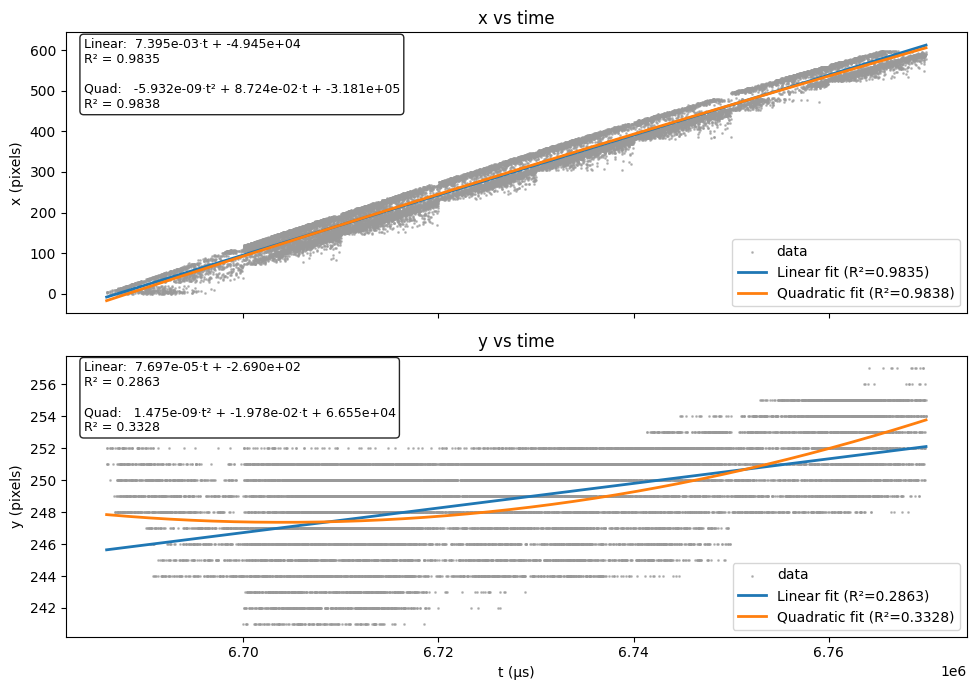

In [22]:
import numpy as np
import matplotlib.pyplot as plt

t = df["t"].to_numpy()
x = df["x"].to_numpy()
y = df["y"].to_numpy()

# time_a = 0e7  # start time in µs
# time_b = 100e7  # end time in µs
# mask = (t >= time_a) & (t <= time_b)
# t = t[mask]
# x = x[mask]
# y = y[mask]

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return np.nan if ss_tot == 0 else (1.0 - ss_res / ss_tot)

def fit_and_plot(ax, t, v, label):
    order = np.argsort(t)
    ts = t[order]
    vs = v[order]

    # Scatter in neutral color
    ax.scatter(
        ts, vs,
        s=1,
        color="0.6",      # light gray
        alpha=0.6,
        rasterized=True,
        label="data"
    )

    #Linear fit (blue)
    p1 = np.polyfit(ts, vs, 1)
    v1 = np.polyval(p1, ts)
    r2_1 = r2_score(vs, v1)
    ax.plot(
        ts, v1,
        color="tab:blue",
        linewidth=2,
        label=f"Linear fit (R²={r2_1:.4f})"
    )

    # Quadratic fit (orange)
    p2 = np.polyfit(ts, vs, 2)
    v2 = np.polyval(p2, ts)
    r2_2 = r2_score(vs, v2)
    ax.plot(
        ts, v2,
        color="tab:orange",
        linewidth=2,
        label=f"Quadratic fit (R²={r2_2:.4f})"
    )

    # Annotation
    m, b = p1
    a2, b2, c2 = p2
    text = (
        f"Linear:  {m:.3e}·t + {b:.3e}\n"
        f"R² = {r2_1:.4f}\n\n"
        f"Quad:   {a2:.3e}·t² + {b2:.3e}·t + {c2:.3e}\n"
        f"R² = {r2_2:.4f}"
    )
    ax.text(
        0.02, 0.98, text,
        transform=ax.transAxes,
        va="top", ha="left",
        fontsize=9,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
    )

    ax.legend(loc="best")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

fit_and_plot(ax1, t, x, "x")
ax1.set_ylabel("x (pixels)")
ax1.set_title("x vs time")

fit_and_plot(ax2, t, y, "y")
ax2.set_xlabel("t (µs)")
ax2.set_ylabel("y (pixels)")
ax2.set_title("y vs time")

plt.tight_layout()
plt.show()

In [23]:
import plotly.graph_objects as go
import numpy as np

# ---- BUILD INTERACTIVE 3D FIG ----
fig = go.Figure(data=[
    go.Scatter3d(
        x=x,
        y=y,
        z=t,
        mode='markers',
        marker=dict(
            size=2,
            color=t,        # color by time
            colorscale='Viridis',
            opacity=0.8
        )
    )
])

fig.update_layout(
    title="Interactive 3D Bullet Trajectory (x, y, t)",
    scene=dict(
        xaxis_title="x_bin (virtual pixels)",
        yaxis_title="y_bin (virtual pixels)",
        yaxis=dict(range=[0, 480]),
        zaxis_title="time (µs)"
    ),
    width=900,
    height=700
)

fig.show()

In [24]:
import numpy as np
np.load('events_2.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'events_2.npy'